# The Efficient Frontier of Optimal Portfolio Transactions

### Introduction

[Almgren and Chriss](https://cims.nyu.edu/~almgren/papers/optliq.pdf) showed that for each value of risk aversion there is a unique optimal execution strategy. The optimal strategy is obtained by minimizing the **Utility Function** $U(x)$:

\begin{equation}
U(x) = E(x) + \lambda V(x)
\end{equation}

where $E(x)$ is the **Expected Shortfall**, $V(x)$ is the **Variance of the Shortfall**, and $\lambda$ corresponds to the trader’s risk aversion. The expected shortfall and variance of the optimal trading strategy are given by:

<img src="./text_images/eq.png" width="700" height="900">

In this notebook, we will learn how to visualize and interpret these equations.

# The Expected Shortfall

As we saw in the previous notebook, even if we use the same trading list, we are not guaranteed to always get the same implementation shortfall due to the random fluctuations in the stock price. This is why we had to reframe the problem of finding the optimal strategy in terms of the average implementation shortfall and the variance of the implementation shortfall. We call the average implementation shortfall, the expected shortfall $E(x)$, and the variance of the implementation shortfall $V(x)$. So, whenever we talk about the expected shortfall we are really talking about the average implementation shortfall. Therefore, we can think of the expected shortfall as follows. Given a single trading list, the expected shortfall will be the value of the average implementation shortfall if we were to implement this trade list in the stock market many times. 

To see this, in the code below we implement the same trade list on 50,000 trading simulations. We call each trading simulation an episode. Each episode will consist of different random fluctuations in stock price. For each episode we will compute the corresponding implemented shortfall. After all the 50,000 trading simulations have been carried out we calculate the average implementation shortfall and the variance of the implemented shortfalls. We can then compare these values with the values given by the equations for $E(x)$ and $V(x)$ from the Almgren and Chriss model.

Average Implementation Shortfall: $243,477.12
Standard Deviation of the Implementation Shortfall: $1,676,453.07


Number of Days to Sell All the Shares:,60,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,128.4,Expected Shortfall:,"$227,123.54"
Utility:,"$229,850.69",Standard Deviation of Shortfall:,"$1,651,408.96"


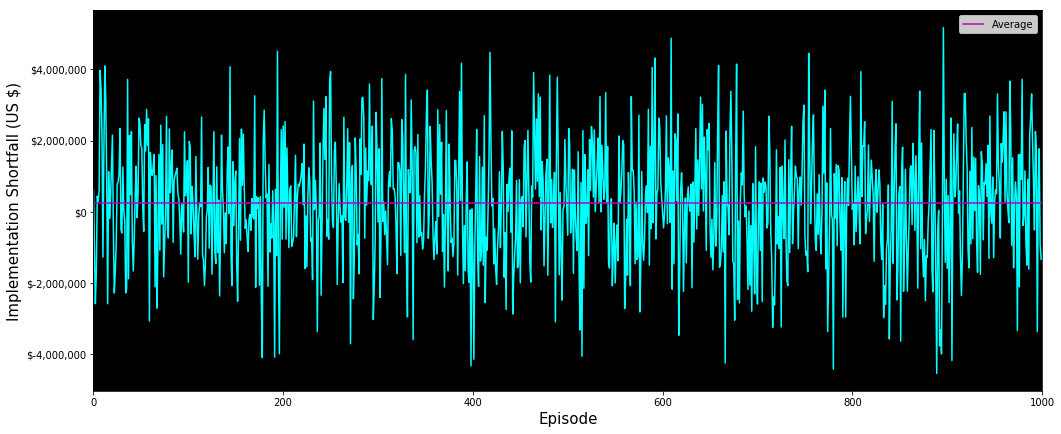

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]
 

# Set the liquidation time
l_time = 60

# Set the number of trades
n_trades = 60

# Set trader's risk aversion
t_risk = 1e-9

# Set the number of episodes to run the simulation
episodes = 1000
 
utils.get_av_std(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk, trs = episodes)
    
# Get the AC Optimal strategy for the given parameters
ac_strategy = utils.get_optimal_vals(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk)
ac_strategy

# Extreme Trading Strategies

Because some investors may be willing to take more risk than others, when looking for the optimal strategy we have to consider a wide range of risk values, ranging from those traders that want to take zero risk to those who want to take as much risk as possible. Let's take a look at these two extreme cases. We will define the **Minimum Variance** strategy as that one followed by a trader that wants to take zero risk and the **Minimum Impact** strategy at that one followed by a trader that wants to take as much risk as possible. Let's take a look at the values of $E(x)$ and $V(x)$ for these extreme trading strategies. The `utils.get_min_param()` uses the above equations for $E(x)$ and $V(x)$, along with the parameters from the trading environment to calculate the expected shortfall and standard deviation (the square root of the variance) for these strategies. We'll start by looking at the Minimum Impact strategy.

In [8]:
import utils

# Get the minimum impact and minimum variance strategies
minimum_impact, minimum_variance = utils.get_min_param()

In [11]:
print(minimum_impact)

                                     AC Optimal Strategy for Minimum Impact                                    
Number of Days to Sell All the Shares:                250   Initial Portfolio Value:             $50,000,000.00
Half-Life of The Trade:                       1,284,394.9   Expected Shortfall:                     $197,000.00
Utility:                                      $197,000.00   Standard Deviation of Shortfall:      $3,453,707.55


### Minimum Impact Strategy

This trading strategy will be taken by trader that has no regard for risk. In the Almgren and Chriss model this will correspond to having the trader's risk aversion set to $\lambda = 0$. In this case the trader will sell the shares at a constant rate over a long period of time. By doing so, he will minimize market impact, but will be at risk of losing a lot of money due to the large variance. Hence, this strategy will yield the lowest possible expected shortfall and the highest possible variance, for a given set of parameters. We can see that for the given parameters, this strategy yields an expected shortfall of \$197,000 dollars but has a very big standard deviation of over 3 million dollars. 

In [12]:
minimum_impact

Number of Days to Sell All the Shares:,250,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,"1,284,394.9",Expected Shortfall:,"$197,000.00"
Utility:,"$197,000.00",Standard Deviation of Shortfall:,"$3,453,707.55"


### Minimum Variance Strategy

This trading strategy will be taken by trader that wants to take zero risk, regardless of transaction costs. In the Almgren and Chriss model this will correspond to having a variance of $V(x) = 0$. In this case, the trader would prefer to sell the all his shares immediately, causing a known price impact, rather than risk trading in small increments at successively adverse prices. This strategy will yield the smallest possible variance, $V(x) = 0$, and the highest possible expected shortfall, for a given set of parameters. We can see that for the given parameters, this strategy yields an expected shortfall of over 2.5 million dollars but has a standard deviation equal of zero.

In [13]:
minimum_variance

Number of Days to Sell All the Shares:,1,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,0.2,Expected Shortfall:,"$2,562,500.00"
Utility:,"$2,562,500.00",Standard Deviation of Shortfall:,$0.00


# The Efficient Frontier

The goal of Almgren and Chriss was to find the optimal strategies that lie between these two extremes. In their paper, they showed how to compute the trade list that minimizes the expected shortfall for a wide range of risk values. In their model, Almgren and Chriss used the parameter $\lambda$ to measure a trader's risk-aversion. The value of $\lambda$ tells us how much a trader is willing to penalize the variance of the shortfall, $V(X)$, relative to expected shortfall, $E(X)$. They showed that for each value of $\lambda$ there is a uniquely determined optimal execution strategy.

>We define the **Efficient Frontier** to be the set of all these optimal trading strategies. That is, the efficient frontier is the set that contains the optimal trading strategy for each value of $\lambda$.

The efficient frontier is often visualized by plotting $(x,y)$ pairs for a wide range of $\lambda$ values, where the $x$-coordinate is given by the equation of the expected shortfall, $E(X)$, and the $y$-coordinate is given by the equation of the variance of the shortfall, $V(X)$. Therefore, for a given a set of parameters, the curve defined by the efficient frontier represents the set of optimal trading strategies that give the lowest expected shortfall for a defined level of risk.

In the code below, we plot the efficient frontier for $\lambda$ values in the range $(10^{-7}, 10^{-4})$, using the default parameters in our trading environment. Each point of the frontier represents a distinct strategy for optimally liquidating the same number of stocks. A risk-averse trader, who wishes to sell quickly to reduce exposure to stock price volatility, despite the trading costs incurred in doing so, will likely choose a value of $\lambda = 10^{-4}$. On the other hand, a trader
who likes risk, who wishes to postpones selling, will likely choose a value of $\lambda = 10^{-7}$. In the code, you can choose a particular value of $\lambda$ to see the expected shortfall and level of variance corresponding to that particular value of trader's risk aversion.

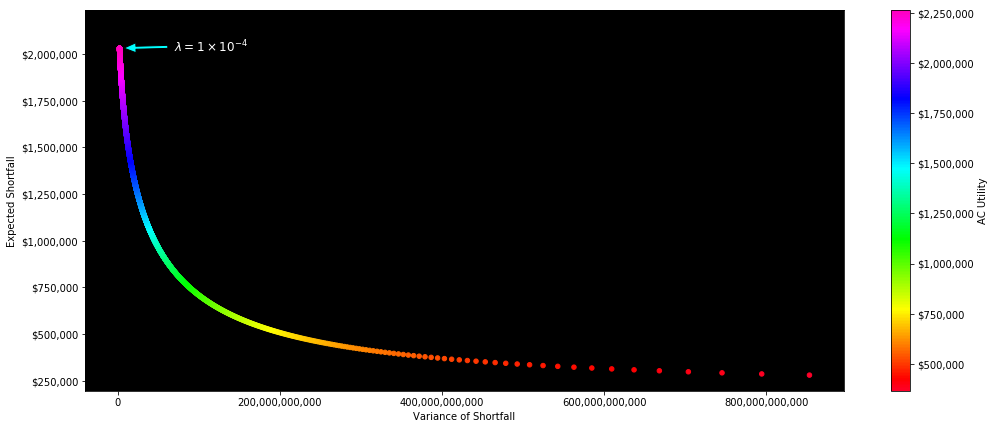

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]
    
# Plot the efficient frontier for the default values. The plot points out the expected shortfall and variance of the
# optimal strategy for the given the trader's risk aversion. Valid range for the trader's risk aversion (1e-7, 1e-4). 
utils.plot_efficient_frontier(tr_risk = 1e-4)